In [ ]:
zip_path = '/content/drive/My\ Drive/Datasets/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

# !rm /content/cats-dogs.zip

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0

In [ ]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rescale=1.0/255.0)

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_aug_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_aug_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model = model.fit_generator(train_aug_iterator, steps_per_epoch=len(train_aug_iterator), validation_data=test_aug_iterator, validation_steps=len(test_aug_iterator), epochs=75)

Epoch 1/75
100/100 [==============================] - 129s 1s/step - loss: 0.5863 - accuracy: 0.6890 - val_loss: 0.5489 - val_accuracy: 0.7220
Epoch 2/75
100/100 [==============================] - 131s 1s/step - loss: 0.5678 - accuracy: 0.7057 - val_loss: 0.5281 - val_accuracy: 0.7322
Epoch 3/75
100/100 [==============================] - 133s 1s/step - loss: 0.5657 - accuracy: 0.7092 - val_loss: 0.5264 - val_accuracy: 0.7376
Epoch 4/75
100/100 [==============================] - 130s 1s/step - loss: 0.5568 - accuracy: 0.7130 - val_loss: 0.5391 - val_accuracy: 0.7269
Epoch 5/75
100/100 [==============================] - 129s 1s/step - loss: 0.5497 - accuracy: 0.7193 - val_loss: 0.5323 - val_accuracy: 0.7185
Epoch 6/75
100/100 [==============================] - 130s 1s/step - loss: 0.5492 - accuracy: 0.7207 - val_loss: 0.5060 - val_accuracy: 0.7464
Epoch 7/75
100/100 [==============================] - 132s 1s/step - loss: 0.5382 - accuracy: 0.7293 - val_loss: 0.5116 - val_accuracy: 0.7469

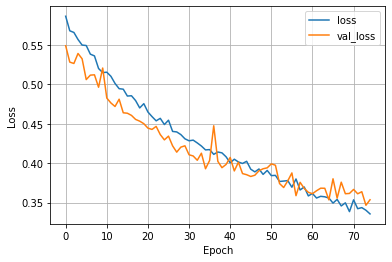

In [ ]:
plot_loss(history_base_model)

# Kesimpulan

Untuk nilai akurasi yang didapatkan antara model Baseline dengan model Augmentation, akurasi dari model Augmentation lebih baik meskipun model ini membutuhkan waktu yang lebih lama, nilai yang didapatkan yaitu pada Epoch 57 loss: 0.3799 - accuracy: 0.8292 - val_loss: 0.3587 - val_accuracy: 0.8499, sedangkan pada model baseline itu hasil yang paling baik didapatkan pada Epoch 35 loss: 0.3736 - accuracy: 0.8408 - val_loss: 0.5692 - val_accuracy: 0.7167.

Untuk grafik nya sendiri val_loss pada model augmentation lebih cendrung mengecil seiring meningkatnya Epoch sehingga bisa dikatakan model ini sudah lumayan baik, sedangkan pada model baseline nilai val_loss nya pada sekitar Epoch 35/36 itu malah naik dan berbanding terbalik dengan loss.